In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [5]:
df = pd.read_csv('data\stud.csv')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
X = df.drop(columns=['math_score'],axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
y = df['math_score']

In [10]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ('StandardScaler',numeric_transformer,num_features),
        ('OneHotEncoder',oh_transformer,cat_features)
    ]
)

In [11]:
X = preprocessor.fit_transform(X)

In [13]:
X.shape

(1000, 19)

In [14]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [15]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2 = r2_score(true,predicted)
    return mse,mae,r2

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "CatBoostRegressor": CatBoostRegressor(verbose=False),
    "SVR": SVR()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,y_test_pred)
    
    print(f"{list(models.keys())[i]}")
    model_list.append(list(models.keys())[i])
    print("Model Performance:")
    print("- Root Mean Squared Error: {}".format(model_test_rmse))
    print("- R2 Score: {}".format(model_test_r2))
    print("- Mean Absolute Error: {}".format(model_test_mae))
    
    print('-'*30)
    
    print("Model Performance for test set:")
    print("- Root Mean Squared Error: {}".format(model_test_rmse))
    print("- R2 Score: {}".format(model_test_r2))
    print("- Mean Absolute Error: {}".format(model_test_mae))
    r2_list.append(model_test_r2)
    print("-"*30)
    print("\n")

Linear Regression
Model Performance:
- Root Mean Squared Error: 4.214763142474849
- R2 Score: 0.8804332983749565
- Mean Absolute Error: 29.095169866715466
------------------------------
Model Performance for test set:
- Root Mean Squared Error: 4.214763142474849
- R2 Score: 0.8804332983749565
- Mean Absolute Error: 29.095169866715466
------------------------------


Lasso
Model Performance:
- Root Mean Squared Error: 5.157879138921816
- R2 Score: 0.825320079562973
- Mean Absolute Error: 42.50633235127344
------------------------------
Model Performance for test set:
- Root Mean Squared Error: 5.157879138921816
- R2 Score: 0.825320079562973
- Mean Absolute Error: 42.50633235127344
------------------------------


Ridge
Model Performance:
- Root Mean Squared Error: 4.21110068801426
- R2 Score: 0.8805931485028737
- Mean Absolute Error: 29.056272192348302
------------------------------
Model Performance for test set:
- Root Mean Squared Error: 4.21110068801426
- R2 Score: 0.880593148502873

In [19]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2 Score']).sort_values(by='R2 Score',ascending=False)

,Model,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
8,CatBoostRegressor,0.851632
7,AdaBoostRegressor,0.851272
5,Random Forest Regressor,0.848038
1,Lasso,0.825320
6,XGBRegressor,0.821220
3,K-Neighbors Regressor,0.783770
4,Decision Tree,0.735348
9,SVR,0.728600


In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test,y_pred)*100
print(f"Accuracy of the model is: {score:.2f}%")

Accuracy of the model is: 88.04%


Text(0, 0.5, 'Predictions')

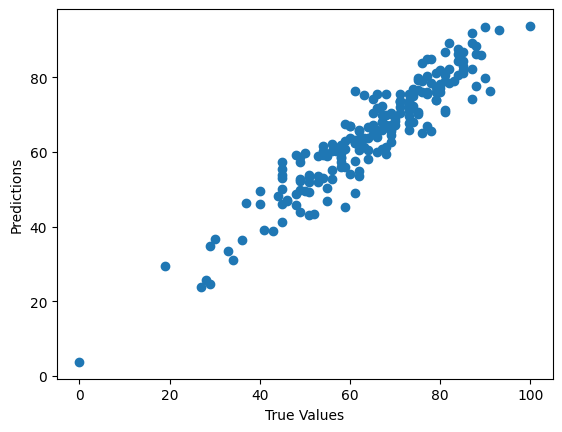

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')

<Axes: xlabel='math_score'>

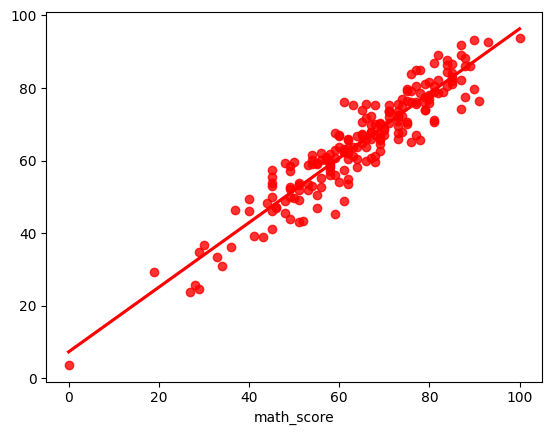

In [27]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='r')

In [28]:
pred_df = pd.DataFrame({'True Values':y_test,'Predictions':y_pred,'Difference':y_test-y_pred})
pred_df.head()

,True Values,Predictions,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
